<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Hackathon_Wipro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the DataSet**

In [175]:
import pandas as pd
df_raw_train=pd.read_csv("/content/drive/MyDrive/Hackathon/Hackathon_Wipro/train (1).csv")

In [176]:
df_raw_test=pd.read_csv("/content/drive/MyDrive/Hackathon/Hackathon_Wipro/test (1).csv")

In [177]:
df_raw_train.shape

(175296, 18)

In [178]:
df_raw_test.shape

(17520, 18)

In [111]:
df_raw_train.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [56]:
df_raw_test.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


In [179]:
df_raw_train.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [180]:
df_raw_test.isna().sum()

Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Cloud Type                0
Dew Point                 0
Temperature               0
Pressure                  0
Relative Humidity         0
Solar Zenith Angle        0
Precipitable Water        0
Wind Direction            0
Wind Speed                0
Fill Flag                 0
Clearsky DHI          17520
Clearsky DNI          17520
Clearsky GHI          17520
dtype: int64

In [181]:
df_raw_test.drop(df_raw_test.columns[[15, 16, 17]], axis = 1, inplace = True)

In [182]:
df_raw_test.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [213]:
df_raw_train.corr()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
Year,1.000000,-1.250676e-04,1.438112e-04,0.000000e+00,0.000000,-0.027271,0.010488,0.001011,0.059987,0.059990,0.041339,0.170655,0.006729,-0.000043,0.057450,-0.032013,-0.025577,0.132889
Month,-0.000125,1.000000e+00,1.079604e-02,-2.852658e-19,0.000000,-0.052826,-0.020091,-0.039901,-0.017394,0.146819,0.200660,-0.046228,-0.109397,0.039427,0.180774,-0.132582,-0.097522,0.005900
Day,0.000144,1.079604e-02,1.000000e+00,-1.030673e-17,0.000000,-0.004006,0.000962,0.000383,0.001174,0.023617,0.022825,-0.040792,0.000032,-0.001020,0.008565,0.006696,-0.006481,-0.001522
Hour,0.000000,-2.852658e-19,-1.030673e-17,1.000000e+00,0.000000,0.688314,0.738537,0.650697,-0.026036,0.021269,0.281493,-0.027240,-0.496931,-0.732434,0.012487,0.005142,0.247012,0.055630
Minute,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-0.001514,-0.001348,-0.000164,0.000485,-0.002042,-0.011724,-0.001636,0.018638,-0.000006,-0.000083,0.000011,-0.009258,-0.000929
Clearsky DHI,-0.027271,-5.282618e-02,-4.005800e-03,6.883137e-01,-0.001514,1.000000,0.860988,0.912991,0.022479,0.222931,0.503409,-0.093766,-0.559766,-0.873421,0.207504,-0.000195,0.315655,0.000740
Clearsky DNI,0.010488,-2.009111e-02,9.616594e-04,7.385367e-01,-0.001348,0.860988,1.000000,0.927926,-0.073302,0.033601,0.384353,0.007043,-0.680471,-0.886323,-0.002180,0.006256,0.381162,0.006318
Clearsky GHI,0.001011,-3.990135e-02,3.825070e-04,6.506965e-01,-0.000164,0.912991,0.927926,1.000000,-0.047297,0.140420,0.478273,-0.050556,-0.655765,-0.891033,0.108725,0.004944,0.349180,-0.030297
Cloud Type,0.059987,-1.739447e-02,1.173973e-03,-2.603568e-02,0.000485,0.022479,-0.073302,-0.047297,1.000000,0.202096,0.066777,-0.137158,0.235374,0.026873,0.326904,-0.081565,0.072632,0.090161
Dew Point,0.059990,1.468194e-01,2.361671e-02,2.126862e-02,-0.002042,0.222931,0.033601,0.140420,0.202096,1.000000,0.848948,-0.419534,0.193455,-0.222336,0.881881,-0.076357,-0.140699,0.036851


In [183]:
cols = ['Year','Month','Day','Hour','Minute','Cloud Type','Dew Point','Temperature','Pressure','Relative Humidity','Solar Zenith Angle','Precipitable Water','Wind Direction','Wind Speed','Fill Flag'] # one or more

Q1 = df_raw_train[cols].quantile(0.25)
Q3 = df_raw_train[cols].quantile(0.75)
IQR = Q3 - Q1

df_new_train = df_raw_train[~((df_raw_train[cols] < (Q1 - 1.5 * IQR)) |(df_raw_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [185]:
df_raw_train.shape

(175296, 18)

In [186]:
df_new_train.shape

(160587, 18)

In [187]:
cols = ['Year','Month','Day','Hour','Minute','Cloud Type','Dew Point','Temperature','Pressure','Relative Humidity','Solar Zenith Angle','Precipitable Water','Wind Direction','Wind Speed','Fill Flag'] # one or more

Q1 = df_raw_test[cols].quantile(0.25)
Q3 = df_raw_test[cols].quantile(0.75)
IQR = Q3 - Q1

df_new_test = df_raw_test[~((df_raw_test[cols] < (Q1 - 1.5 * IQR)) |(df_raw_test[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [188]:
df_raw_test.shape

(17520, 15)

In [189]:
df_new_test.shape

(15379, 15)

In [214]:
df_new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160587 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                160587 non-null  int64  
 1   Month               160587 non-null  int64  
 2   Day                 160587 non-null  int64  
 3   Hour                160587 non-null  int64  
 4   Minute              160587 non-null  int64  
 5   Clearsky DHI        160587 non-null  int64  
 6   Clearsky DNI        160587 non-null  int64  
 7   Clearsky GHI        160587 non-null  int64  
 8   Cloud Type          160587 non-null  int64  
 9   Dew Point           160587 non-null  float64
 10  Temperature         160587 non-null  float64
 11  Pressure            160587 non-null  int64  
 12  Relative Humidity   160587 non-null  float64
 13  Solar Zenith Angle  160587 non-null  float64
 14  Precipitable Water  160587 non-null  float64
 15  Wind Direction      160587 non-nul

**Splitting X and Y**

In [123]:
x_train = df_new_train[df_raw_train.columns[[0,1,2,3,4,8,9,10,11,12,13,14,16,17]]]

In [ ]:
'''x_train = df_new_train[df_raw_train.columns[[1,2,3,4,8,15,16]]] '''  waste

In [215]:
x_train = df_new_train[df_raw_train.columns[[3,10,11,13,14,15,17]]]

In [216]:
y = df_new_train[['Clearsky DHI','Clearsky DNI','Clearsky GHI']]

**Multicolinearity**

In [217]:
VIF = []

In [218]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [219]:
for j in range(x_train.shape[1]):
    VIF.append(variance_inflation_factor(x_train.values,j))
print(VIF)

[8.686313972488671, 18.038299967719915, 57.62032667483062, 18.748623473337737, 11.83207682131678, 4.612058043640489, nan]


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [220]:
import numpy as np
np.transpose(VIF)
pd.DataFrame(x_train.columns)
pd.DataFrame(np.transpose(VIF))
pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(VIF))], axis =1)

,0,0
0,Hour,8.686314
1,Temperature,18.038300
2,Pressure,57.620327
3,Solar Zenith Angle,18.748623
4,Precipitable Water,11.832077
5,Wind Direction,4.612058
6,Fill Flag,NaN


In [221]:
x_train.head(2)

,Hour,Temperature,Pressure,Solar Zenith Angle,Precipitable Water,Wind Direction,Fill Flag
0,0,5.0,1010,106.15,0.499,346.1,0
1,0,5.0,1010,112.28,0.490,346.1,0


In [222]:
y.head(2)

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0,0,0
1,0,0,0


In [55]:
x_test_data = df_new_test[df_raw_train.columns[[0,1,2,3,4,8,9,10,11,12,13,14,15,16,17]]]

**Standardization**

In [223]:
from sklearn.preprocessing import StandardScaler
x_scale_train = StandardScaler().fit_transform(x_train)

In [126]:
from sklearn.preprocessing import StandardScaler
x_scale_test = StandardScaler().fit_transform(x_test_data)

**Splitting Train and Test**

In [224]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scale_train,y,test_size=0.25, random_state=20)

**Train Linear Regression Model with train data Data Set**

In [225]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred_lr = LR.predict(x_test)

In [226]:
y_pred_lr

array([[  23.26530172,   64.45670532,   61.36660514],
       [  -4.58173225, -119.20830117, -125.04756489],
       [ 102.83790663,  498.46049449,  468.02076599],
       ...,
       [  13.23421875,   71.63310506,   18.94716931],
       [  64.95303163,  524.83649616,  364.49811414],
       [ -47.22150233, -265.90452954, -310.23183416]])

In [227]:
from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(y_test,y_pred_lr)
print(lr_mse)

14741.075597041427


In [ ]:
sub =pd.DataFrame(y_pred_knn_test)

**Export the Submission**

In [ ]:
sub.to_excel(r'/content/drive/MyDrive/Hackathon/submission/Final_sub.xlsx', index = False)

In [73]:
from sklearn.svm import SVR
sv_reg = SVR()

In [74]:
sv_reg

SVR()

In [161]:
y_train.head(2)

,Clearsky DHI,Clearsky DNI,Clearsky GHI
133645,0,0,0
76270,76,487,208


In [162]:
y_train.head(2)
type(y_train)

pandas.core.frame.DataFrame

In [163]:
sv_reg.fit(x_train,y_train)
y_pred_reg = sv_reg.predict(x_test)

ValueError: ignored

In [ ]:
SVM_acc = accuracy_score(y_test,y_pred_sv)
print(SVM_acc)
SVM_cm = confusion_matrix(y_test,y_pred_sv)
print(SVM_cm)
SVM_cr = classification_report(y_test,y_pred_sv)
print(SVM_cr)

0.5277350558802419
[[3410   24 1289  146]
 [ 146  103  134   46]
 [2064   37 1481   88]
 [ 497   23  112  153]]
              precision    recall  f1-score   support

           a       0.56      0.70      0.62      4869
           s       0.55      0.24      0.33       429
           u       0.49      0.40      0.44      3670
           w       0.35      0.19      0.25       785

    accuracy                           0.53      9753
   macro avg       0.49      0.38      0.41      9753
weighted avg       0.52      0.53      0.51      9753



In [ ]:
y_pred_sv_test = sv_clf.predict(x_scale_test)

In [ ]:
y_pred_sv_test

array(['u', 'a', 'a', ..., 'a', 'u', 'u'], dtype=object)

**Model fitting of training Data Set with Decision Tree**

In [228]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()


In [229]:
DT

DecisionTreeRegressor()

In [230]:
DT.fit(x_train,y_train)
y_pred_dt = DT.predict(x_test)

In [231]:
y_pred_dt

array([[  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [ 95., 715., 484.],
       ...,
       [  0.,   0.,   0.],
       [ 87., 548., 241.],
       [  0.,   0.,   0.]])

In [232]:
from sklearn.metrics import mean_squared_error
DT_mse = mean_squared_error(y_test,y_pred_dt)
print(DT_mse)

1109.610589417225


In [233]:
DT.tree_.node_count

112183

In [234]:
DT.tree_.max_depth

38

**Model fitting with Ensemble Methods**

**Ada Bosst**

In [132]:
from sklearn.ensemble import AdaBoostRegressor
ADBR = AdaBoostRegressor(base_estimator=DT, n_estimators=1000)


In [133]:
ADBR.fit(x_train,y_train)
y_pred_adab = ADBR.predict(x_test)

ValueError: ignored

In [ ]:
adab_acc = accuracy_score(y_test,y_pred_adab)
print(adab_acc)
adab_cm = confusion_matrix(y_test,y_pred_adab)
print(adab_cm)
adab_cr = classification_report(y_test,y_pred_adab)
print(adab_cr)

0.5206603096483133
[[2816   85 1689  279]
 [ 103  160  122   44]
 [1659   92 1831   88]
 [ 371   32  111  271]]
              precision    recall  f1-score   support

           a       0.57      0.58      0.57      4869
           s       0.43      0.37      0.40       429
           u       0.49      0.50      0.49      3670
           w       0.40      0.35      0.37       785

    accuracy                           0.52      9753
   macro avg       0.47      0.45      0.46      9753
weighted avg       0.52      0.52      0.52      9753



**Gradient Boosting**

In [159]:
from sklearn.ensemble import GradientBoostingRegressor
GRB = GradientBoostingRegressor(loss="squared_error", learning_rate=0.1, n_estimators=100, subsample=1, criterion="friedman_mse", min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0, max_depth=3, min_impurity_decrease=0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0)


In [158]:
GradientBoostingRegressor()

GradientBoostingRegressor()

In [160]:
GRB.fit(x_train,y_train)
y_pred_grb= GRB.predict(x_test)

ValueError: ignored

In [ ]:
grb_acc = accuracy_score(y_test,y_pred_grb)
print(grb_acc)
grb_cm = confusion_matrix(y_test,y_pred_grb)
print(grb_cm)
grb_cr = classification_report(y_test,y_pred_grb)
print(grb_cr)

0.5166615400389624
[[3623   19 1089  138]
 [ 156  110  148   15]
 [2393   44 1192   41]
 [ 560    9  102  114]]
              precision    recall  f1-score   support

           a       0.54      0.74      0.62      4869
           s       0.60      0.26      0.36       429
           u       0.47      0.32      0.38      3670
           w       0.37      0.15      0.21       785

    accuracy                           0.52      9753
   macro avg       0.50      0.37      0.39      9753
weighted avg       0.50      0.52      0.49      9753



In [ ]:
import numpy as np
np.arange(0.01,0.2,0.01)
range(1,100)

range(1, 100)

In [ ]:
np.arange(0.01,0.2,0.01)


array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])

In [ ]:
y_test

19893    a
32235    a
13939    a
17470    a
22714    u
        ..
37601    a
39691    u
640      a
32256    u
38284    u
Name: season, Length: 9753, dtype: object

In [ ]:
y_pred_grb

array(['a', 'a', 'a', ..., 'a', 'a', 'a'], dtype=object)

**XG Boosting**

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train,y_train)
y_pred_xgb= XGB.predict(x_scale_test)

In [ ]:
acc_score_xgb = accuracy_score(y_test,y_pred_xgb).round(3)

In [ ]:
acc_score_xgb

0.518

**Model fitting With Bagging**

In [235]:
from sklearn.ensemble import BaggingRegressor
Bag= BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.9,
                  n_estimators=500)

In [236]:
Bag.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.9,
                 n_estimators=500)

In [237]:
y_pred_bag= Bag.predict(x_test)

In [238]:
y_pred_bag

array([[  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [126.7  , 640.078, 478.716],
       ...,
       [  0.   ,   0.   ,   0.   ],
       [ 58.794, 704.074, 244.488],
       [  0.   ,   0.   ,   0.   ]])

In [239]:
bag_mse = mean_squared_error(y_test,y_pred_bag)
print(bag_mse)

582.502888575783


In [144]:
import numpy as np
mse_bag=[]
settings = np.arange(0.1,1,0.1)

No need to code Random State incase of Bagging. Bagging Will take care of Sample by default.

In [145]:
for i in settings:
    bag =BaggingRegressor(base_estimator=DT, max_samples=i, n_estimators=10)
    bag.fit(x_train,y_train)
    y_pred_bg = bag.predict(x_test)
    mse_bag.append(mean_squared_error(y_test,y_pred_bag))
print(mse_bag)

[452.4702890628939, 452.4702890628939, 452.4702890628939, 452.4702890628939, 452.4702890628939, 452.4702890628939, 452.4702890628939, 452.4702890628939, 452.4702890628939]


No handles with labels found to put in legend.


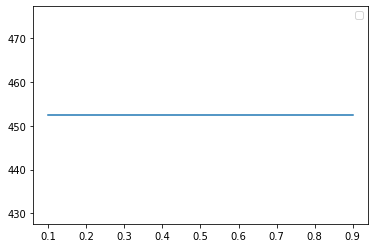

In [147]:
import matplotlib.pyplot as plt
plt.plot(settings,mse_bag)
plt.legend()
plt.show()

**Random Forest**

In [148]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_features=0.6, n_estimators=100)
RF.fit(x_train,y_train)
y_RF_pred = RF.predict(x_test)

In [149]:
rf_mse = mean_squared_error(y_test,y_RF_pred)

In [150]:
rf_mse

442.38205300271534

In [152]:
RF_MSE = []
setting = np.arange(0.1,1,0.1)
for i in setting:
    RF = RandomForestRegressor(max_features=i, n_estimators=100)
    RF.fit(x_train,y_train)
    RF_pred = RF.predict(x_test)
    RF_MSE.append(mean_squared_error(y_test,y_RF_pred))
print(RF_MSE)

[442.38205300271534, 442.38205300271534, 442.38205300271534, 442.38205300271534, 442.38205300271534, 442.38205300271534, 442.38205300271534, 442.38205300271534, 442.38205300271534]
